<a href="https://colab.research.google.com/github/raj-hero/UGProject2/blob/main/solarenergy_passion_etal_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Horizontal Photovoltaic Power Prediction for 12 Sites

### Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.ensemble import RandomForestRegressor

### Load dataset

In [ ]:
df = pd.read_csv('Pasion et al dataset.csv')

### Explore the data

##### Identify available columns in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [ ]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


##### Calculate summary statistics of numerical columns

In [ ]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


##### Visualize data distribution

In [ ]:
# sns.pairplot(df)

##### Correlation analysis

In [ ]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()

<ipython-input-7-5ea694bf2cc9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()


In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

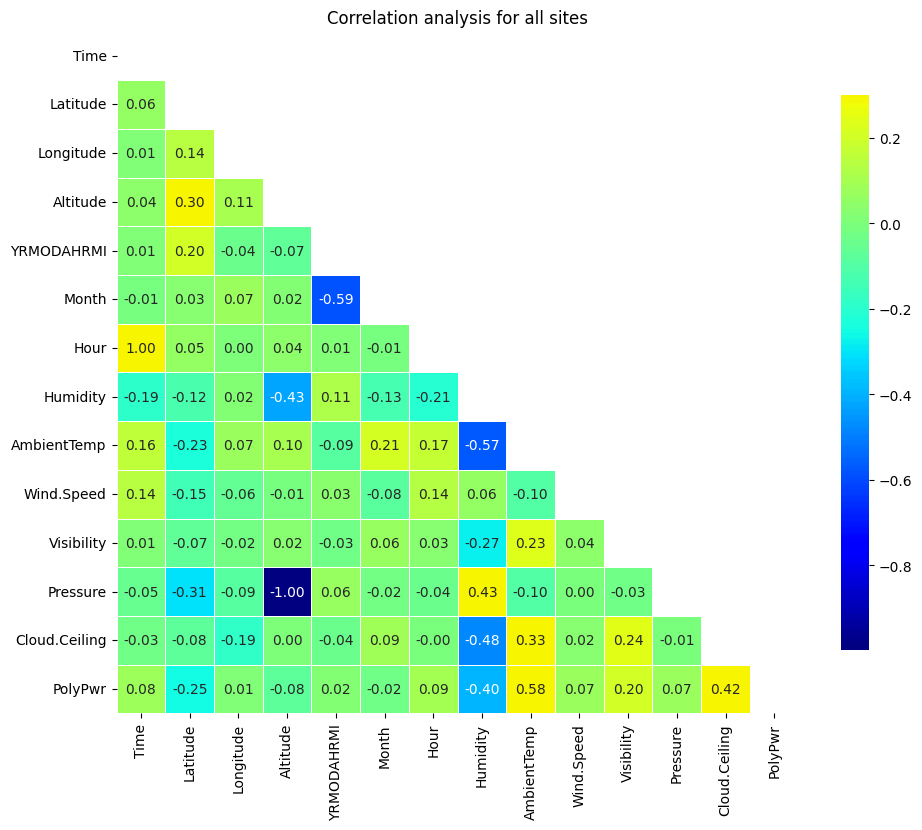

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

### Summary of data Explorartion

<font size="3"> 1. The correlation between Ambient temperature, humidity and power improved when using site level data rather than fleet level data.<br/>
<font size="3"> 2. Also, some input features have their correlation sign with target change for individual sites compared with total sites data (e.g windspeed). <br/>
<font size="3"> 3. Hence, it may be necessary to build machine learning models per site to get the best out of the models. It might also be worth trying to encode the site-specific features like site location.<br/>
<font size="3"> 4. Altitude and pressure are perfectly correlated however, altitude does not change for a particular site and cannot be used for site-level modeling.

### Data Preprocessing

##### Check for missing values

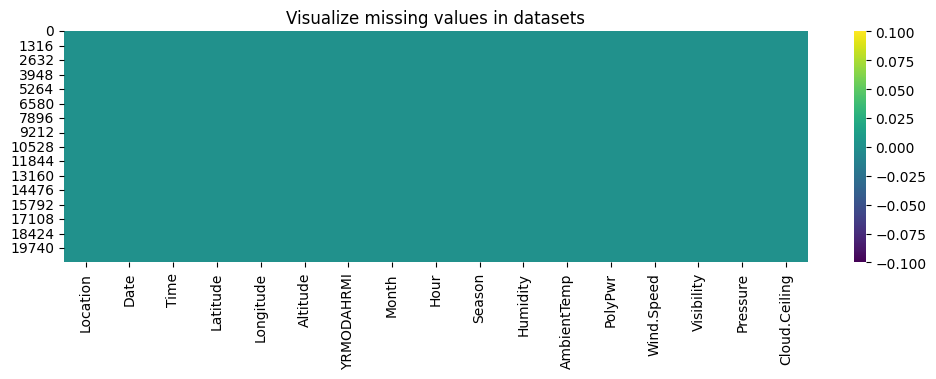

In [ ]:
plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

##### Feature Engineering

In [ ]:
# Encode location data
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [ ]:
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

In [ ]:
min_hour_of_interest = 10
max_hour_of_interest = 15

In [ ]:
df_with_loc_season_en['delta_hr']= df_with_loc_season_en.Hour - min_hour_of_interest

In [ ]:
# Create Cyclic date features
df_with_loc_season_en['sine_mon']= np.sin((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

In [ ]:
mask2 = np.triu(np.ones_like(df_with_loc_season_en.corr(), dtype=bool))

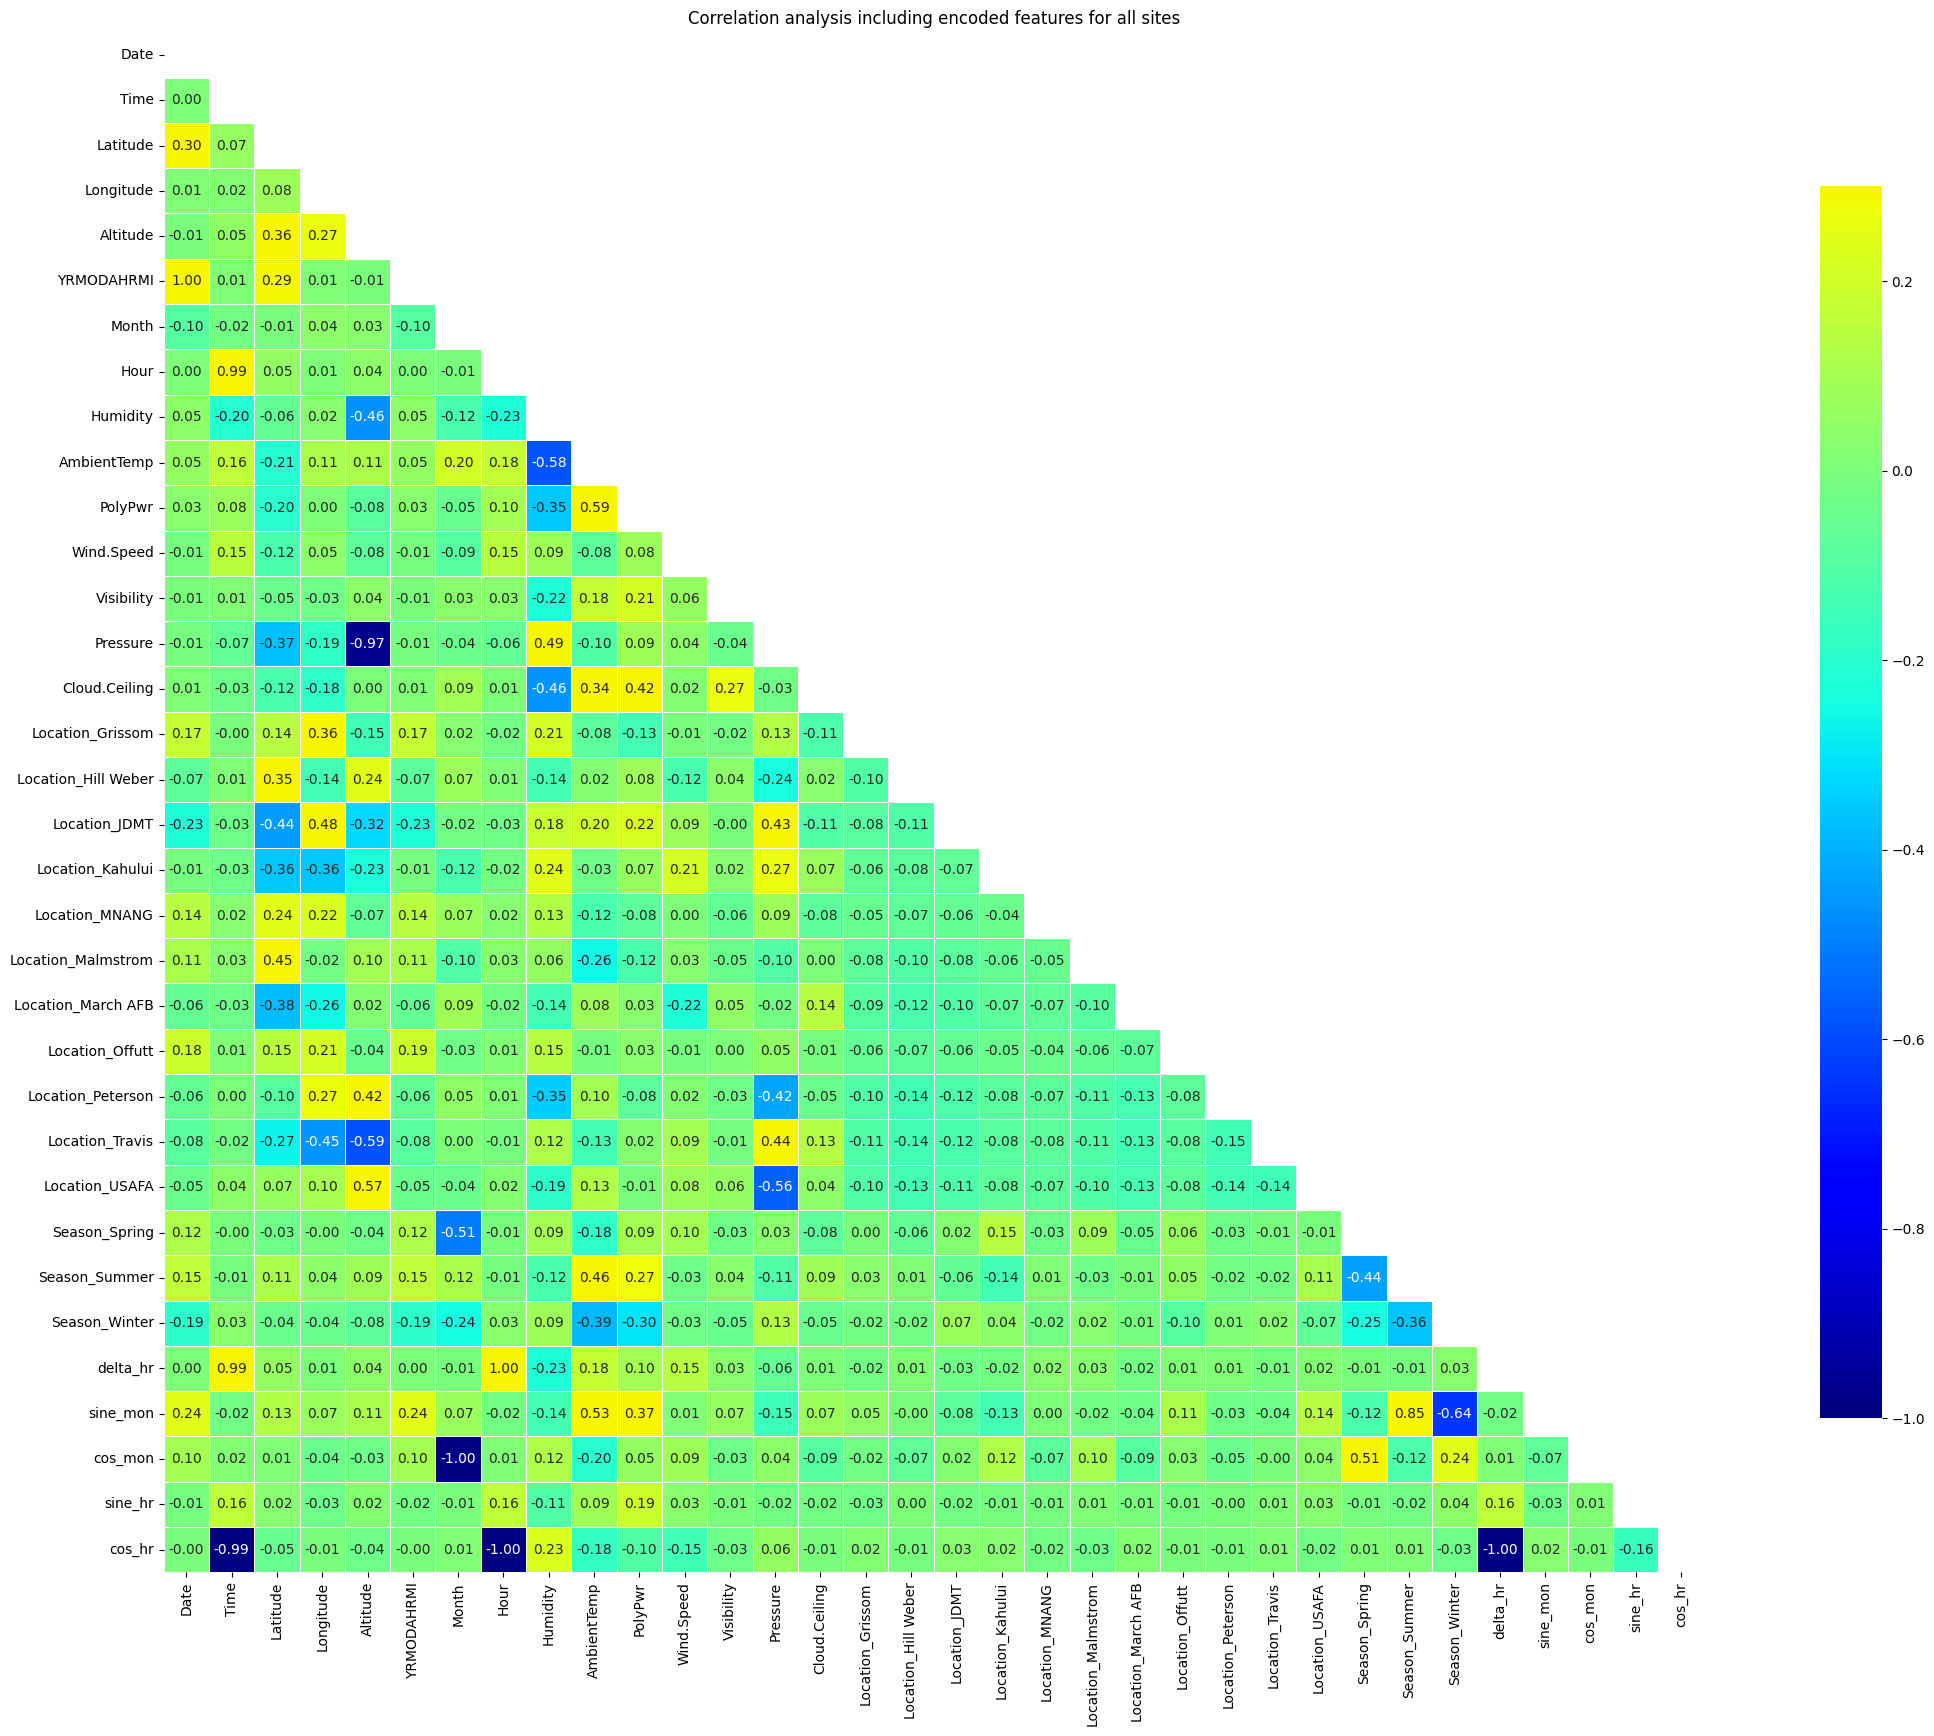

In [ ]:
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df_with_loc_season_en.corr(method='spearman'), mask=mask2, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis including encoded features for all sites');

### Modeling

##### Feature Selection

In [ ]:
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 'Location_Grissom',
                     'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
                     'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
                     'Location_Offutt', 'Location_Peterson', 'Location_Travis',
                     'Location_USAFA','Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

In [ ]:
df_processed = df_with_loc_season_en[selected_columns].reset_index(drop=True)

In [ ]:
target_label = 'PolyPwr'

In [ ]:
input_feat = list(set(selected_columns).difference(set([target_label])))

##### Summary of feature selection

<font size="3"> 1. Altitude is dropped because it has a high correlation with Pressure but does not change for a given location while presesure is more dynamic. <br/>
<font size="3"> 2. Longitude is dropped because it has zero correlation with the target variable. <br/>
<font size="3"> 3. Time, Hour, Month and Date are dropped because they have strong correlations with the engineered cyclic features but low correlation with the target variable.

##### Extract test set from all data

In [ ]:
df_X = df_processed[input_feat].reset_index(drop=True)

In [ ]:
df_y = df_processed[target_label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

##### Perform Cross-validation on training data for hyper-parameter tuning

In [ ]:
# Create list of each hyper-param to tune
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features_list = ['auto', 'sqrt']

max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)

min_samples_split_list = [2, 5, 10]

min_samples_leaf_list = [1, 2, 4]

bootstrap_list = [True, False]

In [ ]:
# Structure model hyper-params as a dictionary
rf_grid = {'n_estimators': n_estimators_list,
           'max_features': max_features_list,
           'max_depth': max_depth_list,
           'min_samples_split': min_samples_split_list,
           'min_samples_leaf': min_samples_leaf_list,
           'bootstrap': bootstrap_list}

In [ ]:
# Create base LGBM model
rf_base = RandomForestRegressor(random_state=42)

In [ ]:
# Create random search for LGBM model
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_grid,
                                 n_iter=1000, cv=4, verbose=2, random_state=42,
                                 n_jobs=-1)

In [ ]:
%%time
# Fit the random search LGBM model
rf_random.fit(X_train, y_train)

In [ ]:
# Get optimal hyper-params
rf_random.best_params_

In [ ]:
# Get score of best model during hyper-param tuning
rf_random.best_score_

In [ ]:
mean_score = rf_random.cv_results_['mean_test_score']
std_score = rf_random.cv_results_['std_test_score']
params = rf_random.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

In [ ]:
# cv_score_df.to_csv('rf_1000it_01_01_2022_case3.csv', index=False)

In [ ]:
# all_results_cv_df = pd.DataFrame(rf_random.cv_results_)

In [ ]:
# all_results_cv_df.to_csv('rf_1000it_01_01_2022_case3_all_results.csv', index=False)

##### Train model using optimal hyper-parameters from above

In [ ]:
rf_model = RandomForestRegressor(**rf_random.best_params_, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

##### Make model inferences on test set

In [ ]:
y_pred = rf_model.predict(X_test)

##### Evaluate model performance on test set

In [ ]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

In [ ]:
# R2 score
r2_score(y_test.ravel(), y_pred)

In [ ]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

In [ ]:
mean_absolute_percentage_error(y_test.ravel(), y_pred)*100

##### Feature importance

In [ ]:
rf_model.feature_importances_

In [ ]:
# Calculate scaled feature importance as a percentage
feat_imp_score = (rf_model.feature_importances_/max(rf_model.feature_importances_)*100).tolist()

In [ ]:
feature_ranking_with_score = dict(sorted(zip(feat_imp_score, input_feat), reverse=True))

In [ ]:
feature_ranking_with_score

In [ ]:
feat_ranking_list = list(feature_ranking_with_score.values())

In [ ]:
np.array(feat_ranking_list)

In [ ]:
plt.plot(y_test[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()